## Setup

In [1]:
import sys
from _path import workdir
sys.path.append(workdir)
print(sys.path)

['c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\python312.zip', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\DLLs', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys', '', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\vince\\OneDrive - The Chinese University of Hong Kong\\python projects\\py binary orbit\\paper_QPE2005\\..']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from src.util.constants import G, msun, c
from src.orbit.empirical.WDBH_EMRI import rWD, rtide, wf, olapf, rWD_E86
from src.orbit.mapping.single_mode.WD_MBH import s_map_WDBH_MT_expo
from src.orbit.mapping.single_mode.WD_MBH import s_dq
from src.orbit.osculating.orb_avg_formula import de_2_5pn

### Initial parameters

In [3]:
mWD = 0.5*msun
mBH = 1.e5*msun
Torb = 9.*3600
a0 = (G*(mBH+mWD)*(Torb/2/np.pi)**2)**(1./3)
rt = rtide(mWD,mBH)

m1, r1 = mWD, rWD(mWD)
m2, r2 = mBH, 2*G*mBH/c**2

In [4]:
w_list1, olap_list1, ell_list1, m_list1 = [wf(mWD)], [olapf(mWD,0.5)], [2], [2]
w_list2, olap_list2, ell_list2, m_list2 = [], [], [], []

q10 = np.zeros(len(w_list1)*len(ell_list1)*len(m_list1))
q20 = np.zeros(len(w_list2)*len(ell_list2)*len(m_list2))

In [5]:
rt_factor = 2.9
rp = rt*rt_factor

In [6]:
# sigma_list = [2.e-3, 5.e-4]
sigma_list = [5.e-4, 3.e-3]
mu1 = 1.
ga = 1.
alpha = 1.43

In [7]:
ef = 0.5

In [8]:
def max_n_GW(m1,m2,r1,wa,olap,rp,a0,ef):
    dq = s_dq(m1,m2,r1,wa,olap,rp)
    e0 = 1 - rp/a0
    P0K = 2*np.pi*np.sqrt(a0**3/G/(m1+m2))
    nf = int((ef-e0)/de_2_5pn(m1,m2,a0,e0)/P0K)
    return nf

In [9]:
ntot = max_n_GW(m1,m2,r1,w_list1[0],olap_list1[0],rp,a0,ef=ef)

## Mapping

In [10]:
qn1, an1, en1, m1n1, m2n1 = s_map_WDBH_MT_expo(m1,m2,w_list1[0],olap_list1[0],q10[0],a0,rp,sigma_list[0],ga,mu1,ntot, alpha = alpha, q_break= 0.0316, m1_min = 0.1, flag_vary_rp = True, flag_print_msg = True)
qn2, an2, en2, m1n2, m2n2 = s_map_WDBH_MT_expo(m1,m2,w_list1[0],olap_list1[0],q10[0],a0,rp,sigma_list[1],ga,mu1,ntot, alpha = alpha, q_break= 0.0316, m1_min = 0.1, flag_vary_rp = True, flag_print_msg = True)
n_list1 = np.array([i+1 for i in range(len(qn1))])
n_list2 = np.array([i+1 for i in range(len(qn2))])

e > 1
e > 1


In [11]:
time1 = np.empty_like(qn1, dtype=np.float64)
for idx, q in enumerate(qn1[:-1]):
    p0 = 2*np.pi*np.sqrt(an1[idx]**3/G/(m1n1[idx]+m2n1[idx]))
    p1 = 2*np.pi*np.sqrt(an1[idx+1]**3/G/(m1n1[idx+1]+m2n1[idx+1]))
    if an1[idx+1] < 0.:
        p1 = 0.
    time1[idx+1] = time1[idx] + (p0+p1)/2

C:\Users\vince\AppData\Local\Temp\ipykernel_10176\1264228896.py:4: RuntimeWarning: invalid value encountered in sqrt
  p1 = 2*np.pi*np.sqrt(an1[idx+1]**3/G/(m1n1[idx+1]+m2n1[idx+1]))


In [12]:
time2 = np.empty_like(qn2, dtype=np.float64)
for idx, q in enumerate(qn2[:-1]):
    p0 = 2*np.pi*np.sqrt(an2[idx]**3/G/(m1n2[idx]+m2n2[idx]))
    p1 = 2*np.pi*np.sqrt(an2[idx+1]**3/G/(m1n2[idx+1]+m2n2[idx+1]))
    if an2[idx+1] < 0.:
        p1 = 0.
    time2[idx+1] = time2[idx] + (p0+p1)/2

C:\Users\vince\AppData\Local\Temp\ipykernel_10176\1009137920.py:4: RuntimeWarning: invalid value encountered in sqrt
  p1 = 2*np.pi*np.sqrt(an2[idx+1]**3/G/(m1n2[idx+1]+m2n2[idx+1]))


### Plots

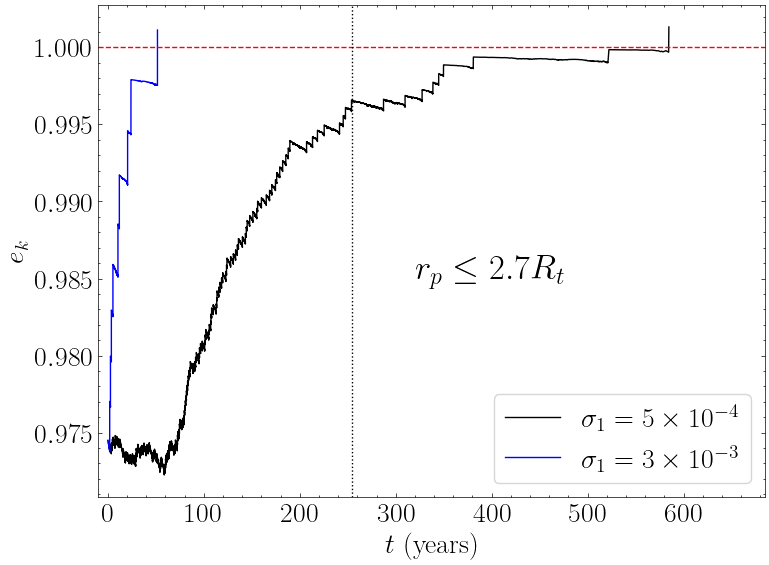

In [19]:
time_27 = time1[np.argmin(np.abs(an1*(1-en1)/rtide(m1n1,m2n1)-2.7))]/31536000

plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.style.use('science')
plt.plot(time1/31536000,en1, linestyle = 'solid', color='black', label = r'$\sigma_1 = 5\times10^{-4}$')
plt.plot(time2/31536000,en2, linestyle = 'solid', color='blue', label = r'$\sigma_1 = 3\times10^{-3}$')
plt.axhline(1.0, linestyle = 'dashed', color = 'red')
# plt.axvline(time1[-1]/31536000, linestyle = 'dashed', color = 'black')
# plt.axvline(time2[-1]/31536000, linestyle = 'dashed', color = 'blue')
plt.axvline(time_27, linestyle = 'dotted', color='black')
plt.xlabel(r'$t$ (years)',fontsize=20)
plt.ylabel(r'$e_k$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim([-10., 850.])
plt.xlim([-10., time1[-1]/31536000+100.])
plt.legend(frameon = 'True', fontsize = 20)
plt.text(320., 0.985, r'$r_p \leq 2.7 R_{t}$', color = 'black', fontsize = 25)

plt.savefig('e_vs_t_MT_unbind.pdf', format="pdf")
plt.show()
plt.close()